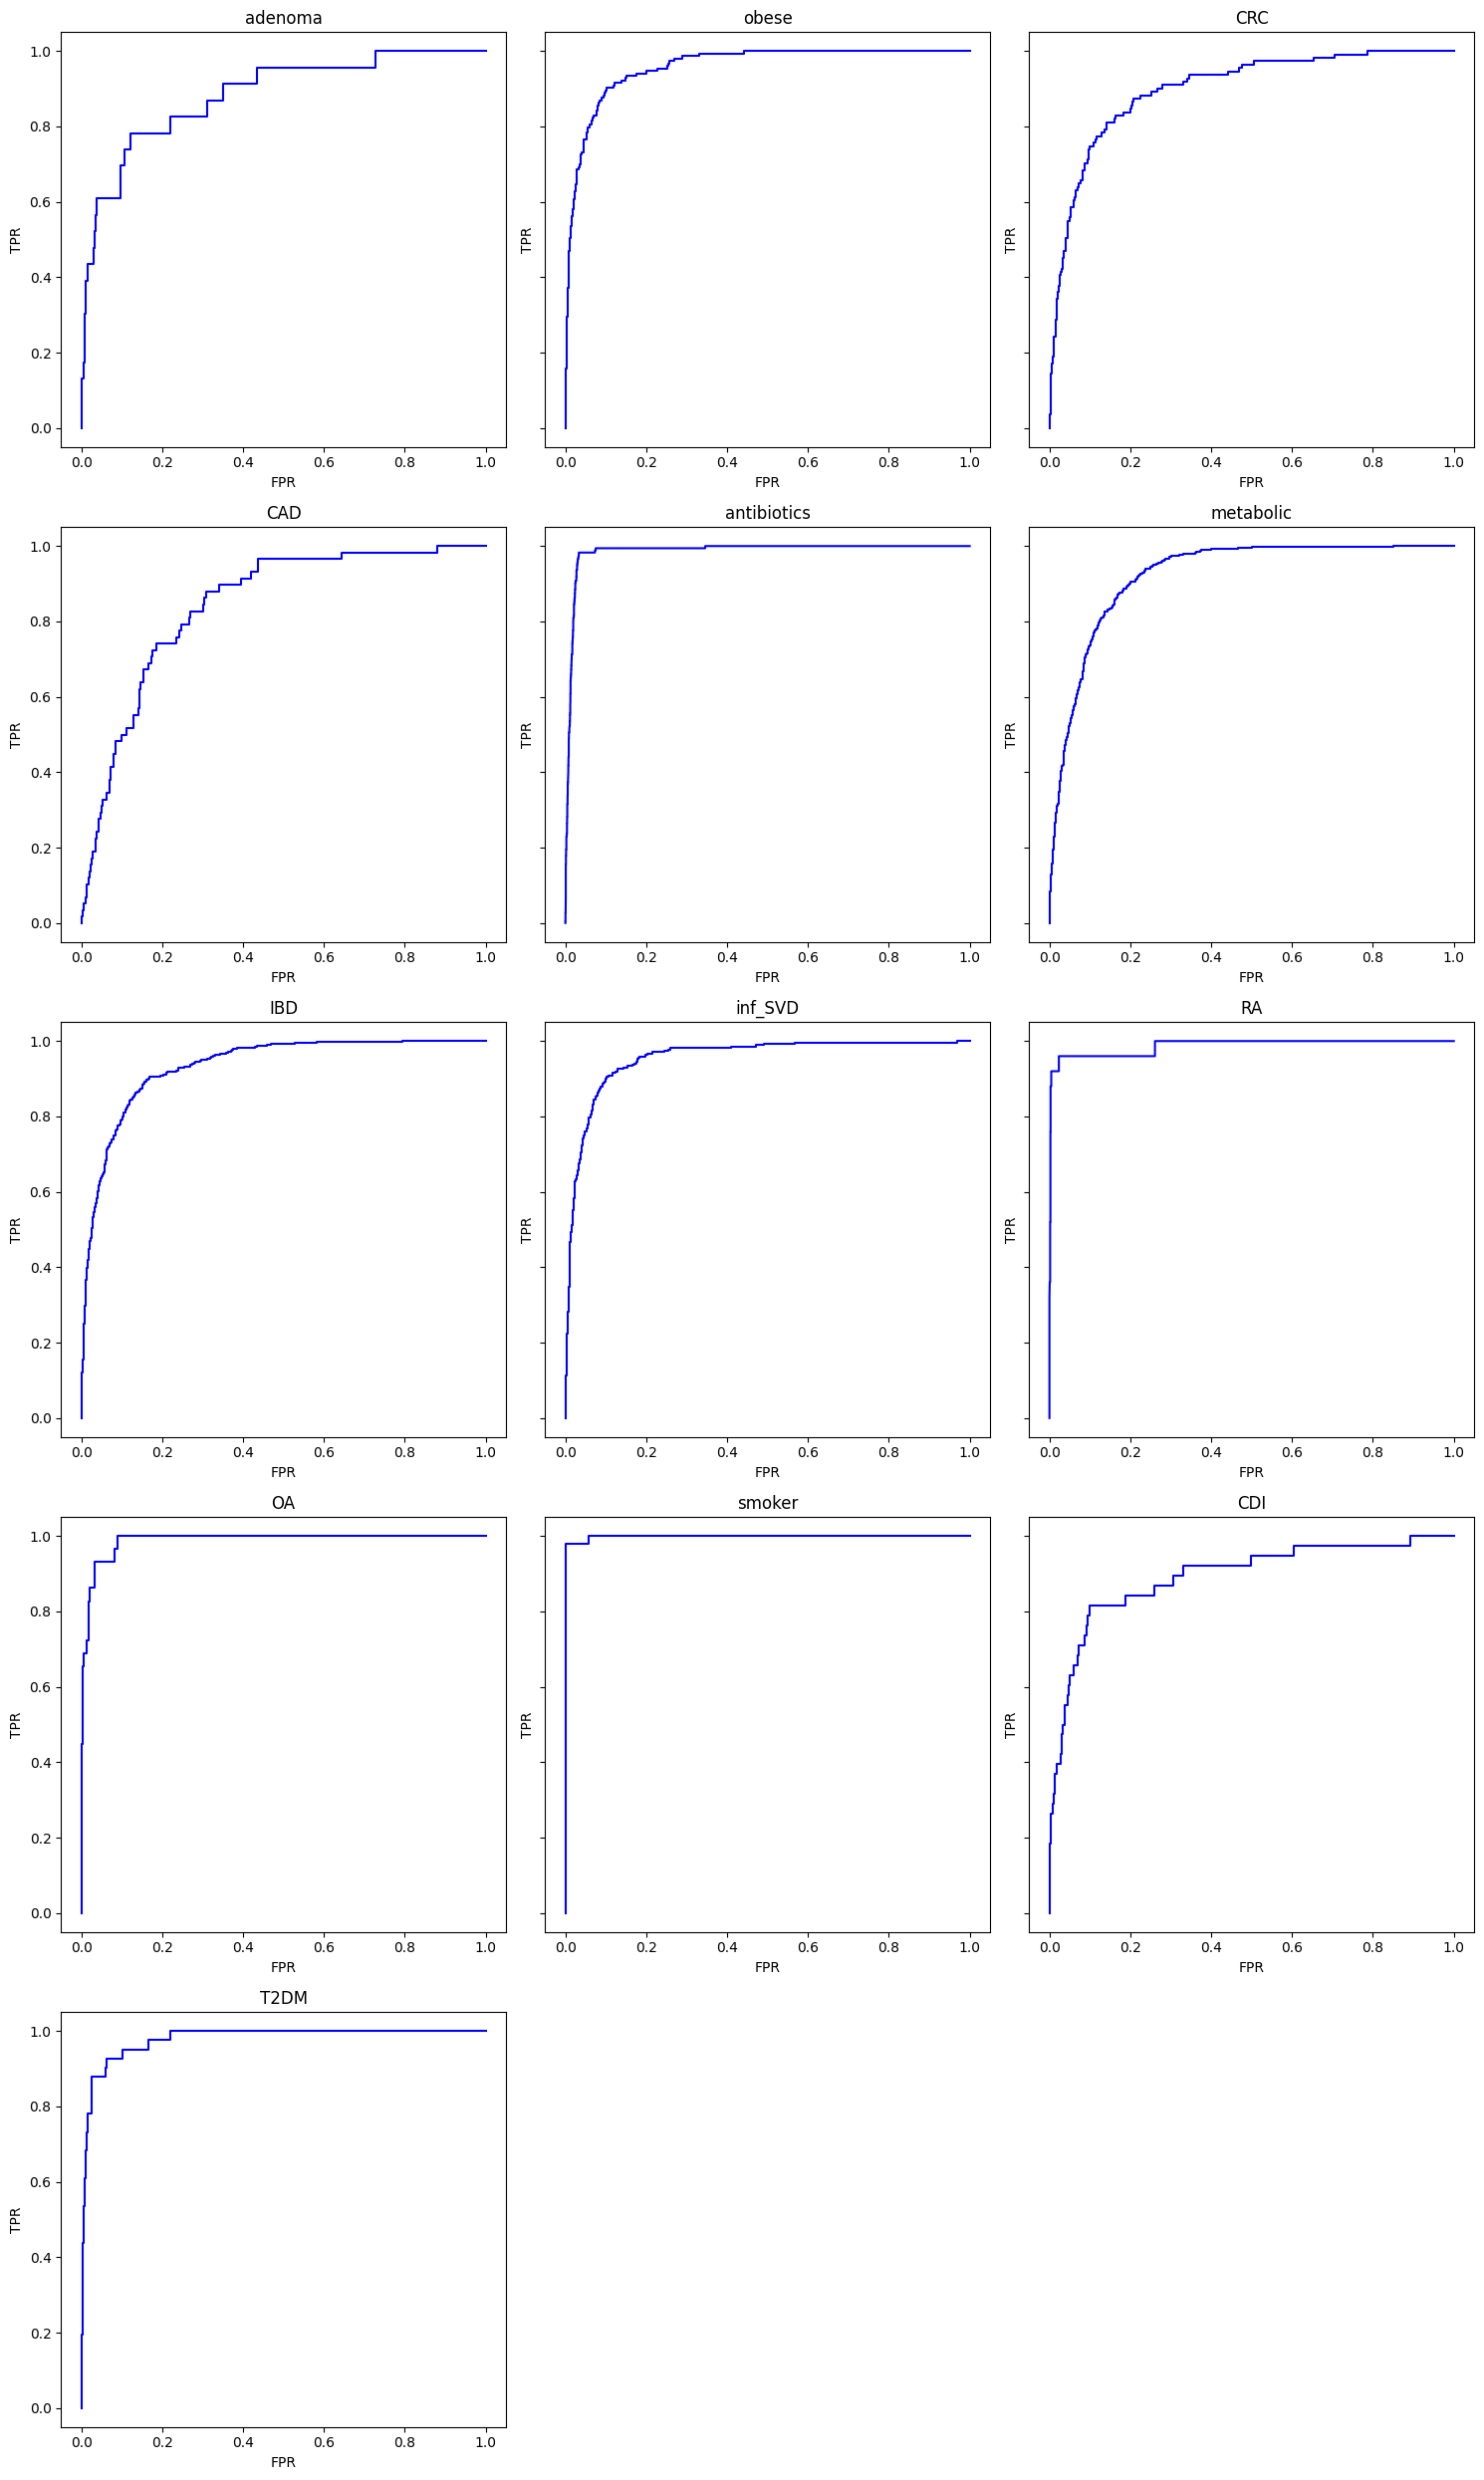

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

# Define the folder containing the results
results_folder = "results"

# Prepare to collect all ROC files
roc_files = [file for file in os.listdir(results_folder) if file.startswith("roc_values_all-")]

# Check if any ROC files are found
if not roc_files:
    print("No files starting with 'roc_values_all-' were found in the 'results' folder.")
else:
    # Determine the number of rows and columns
    num_files = len(roc_files)
    num_cols = 3
    num_rows = math.ceil(num_files / num_cols)

    # Set up the figure for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey=True)
    
    # Flatten axes for easy indexing and fill empty subplots if necessary
    axes = axes.flatten()
    for i in range(len(axes)):
        if i >= num_files:
            axes[i].axis('off')  # Hide unused subplots

    # Loop through each ROC file and create a subplot
    for ax, file_name in zip(axes, roc_files):
        # Load the data
        file_path = os.path.join(results_folder, file_name)
        data = pd.read_csv(file_path)

        # Extract the columns for plotting
        if "FPR" in data.columns and "TPR" in data.columns:
            fpr = data["FPR"]
            tpr = data["TPR"]

            # Plot the data
            ax.plot(fpr, tpr, label='ROC Curve', color='blue')
            ax.set_title(file_name.replace("roc_values_all-", "").replace(".csv", ""))
            ax.set_xlabel("FPR")
            ax.set_ylabel("TPR")
        else:
            ax.text(0.5, 0.5, 'Missing FPR or TPR columns',
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(file_name.replace("roc_values_all-", ""))

    # Adjust layout and show the figure
    plt.tight_layout()
    output_file = "roc_plots-all.png"
    plt.savefig(output_file)
    plt.show()


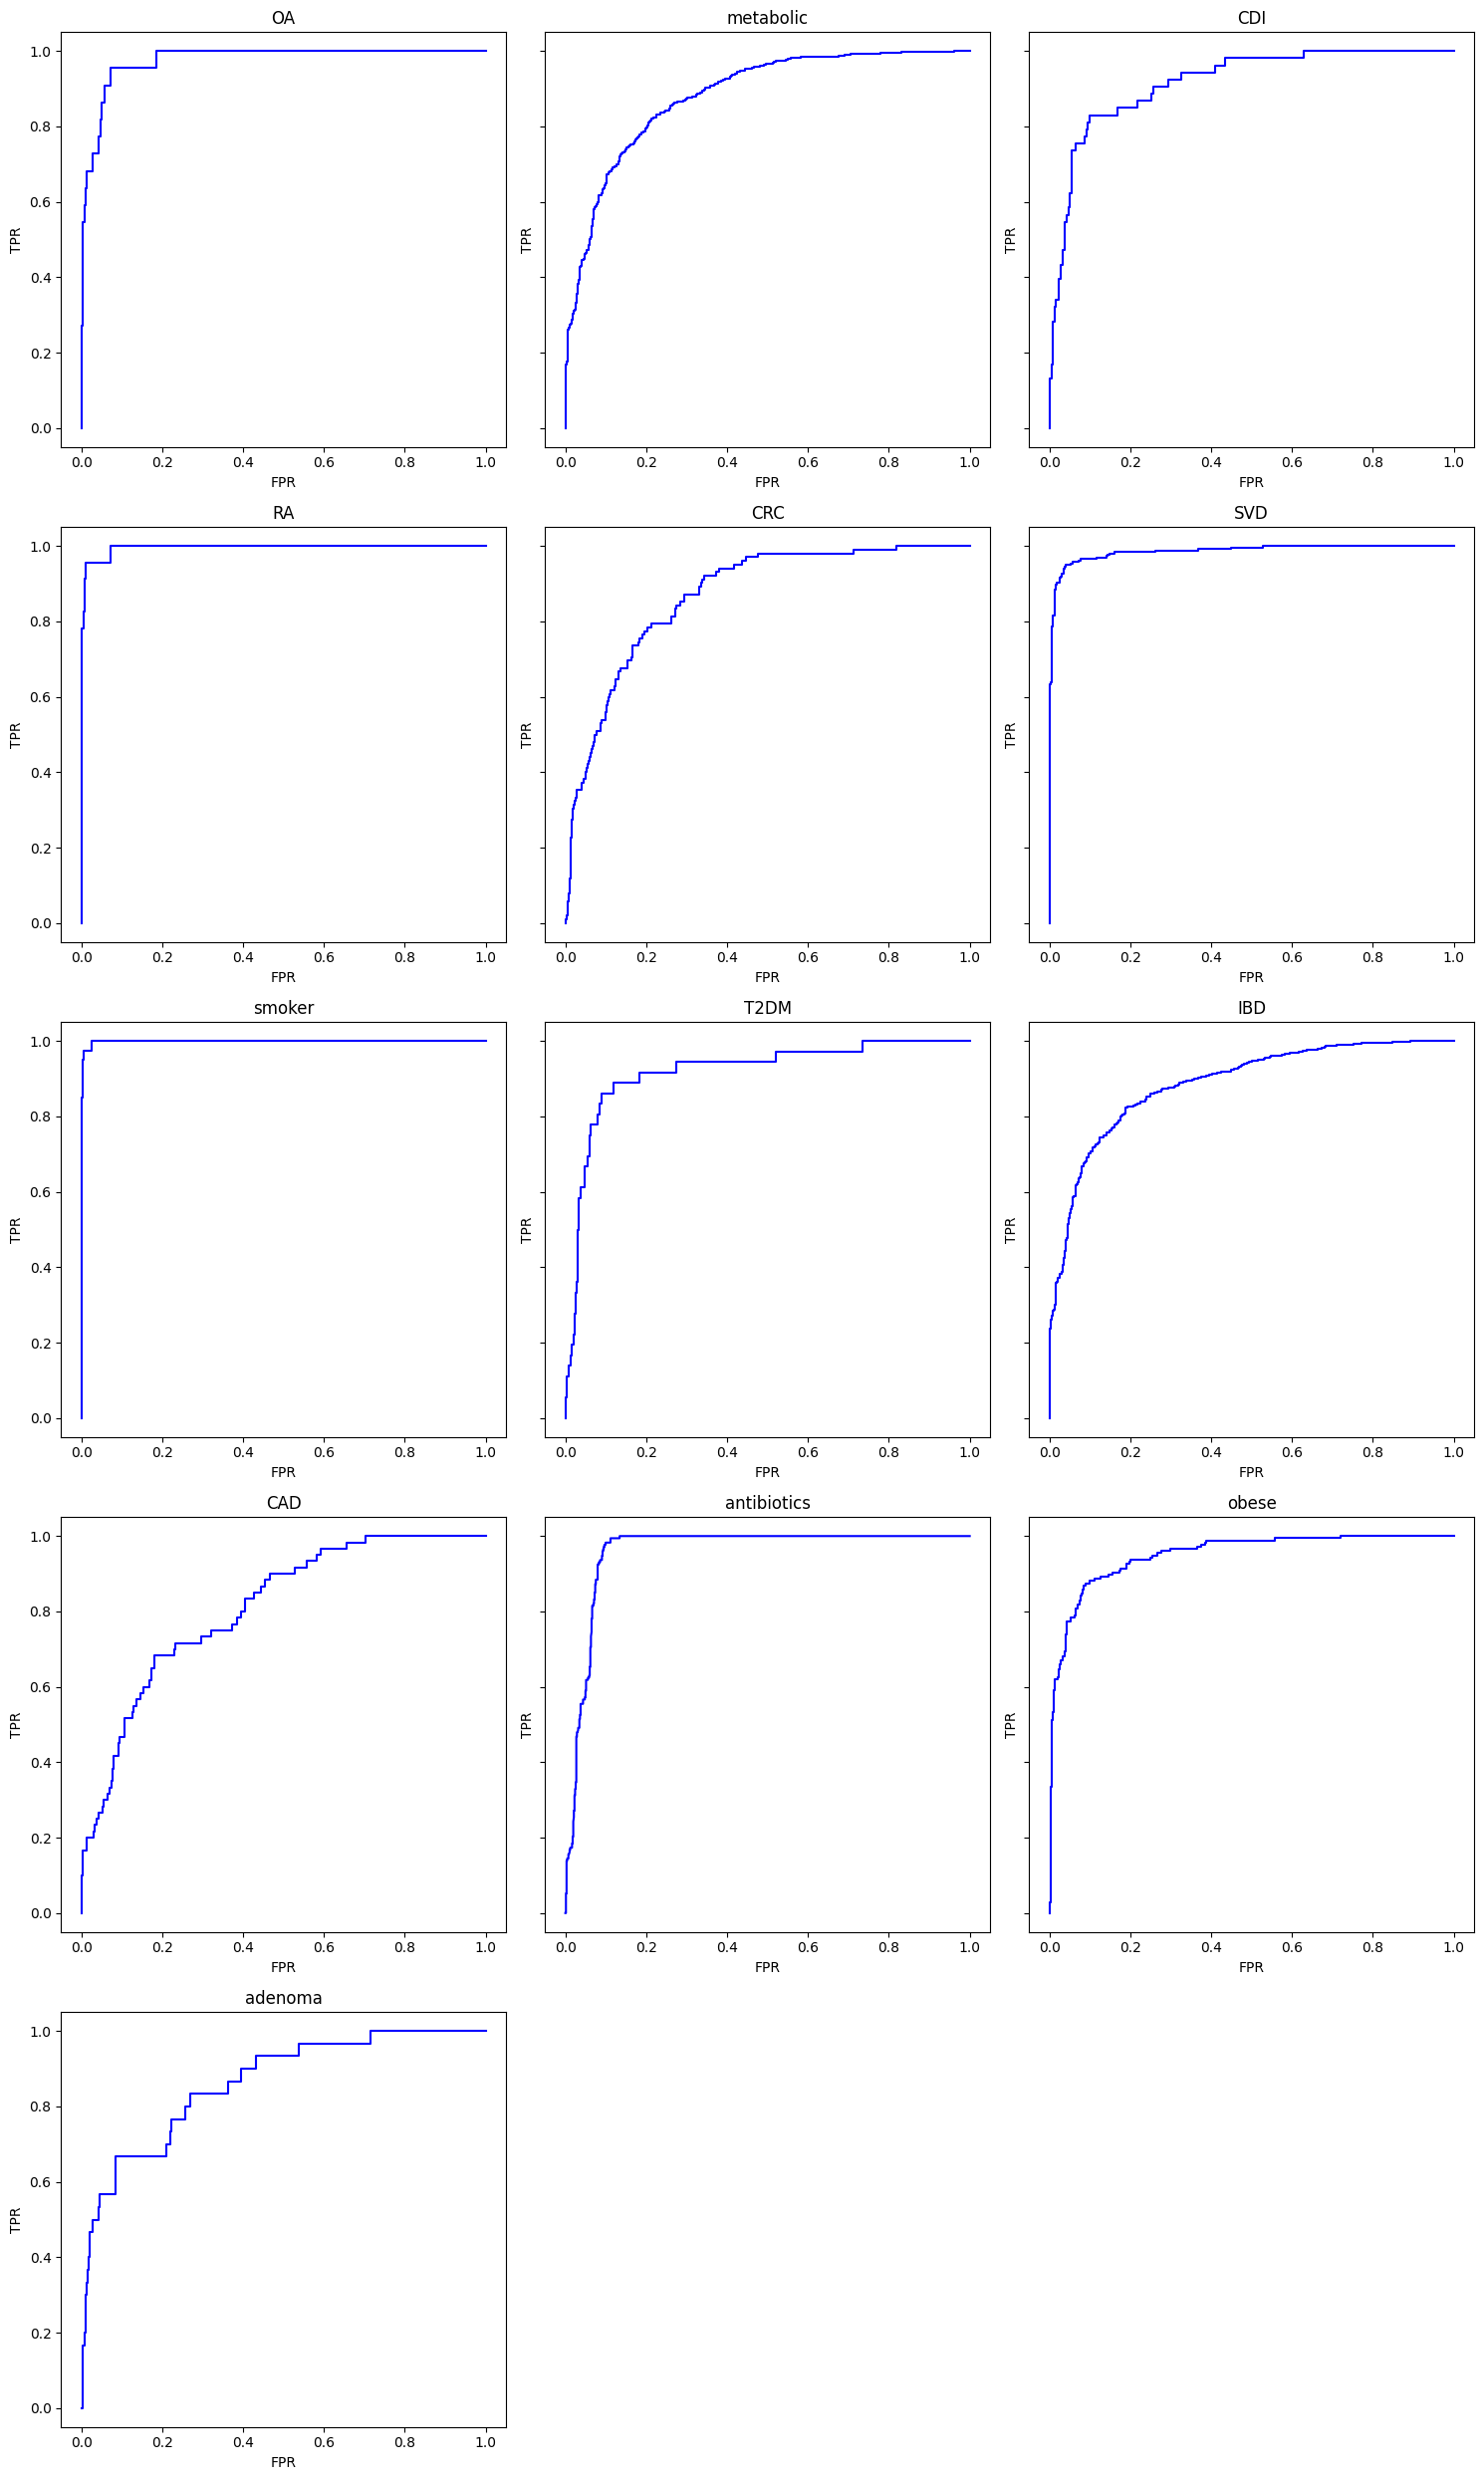

In [5]:

roc_files = [file for file in os.listdir(results_folder) if file.startswith("roc_values_healthy-")]

# Check if any ROC files are found
if not roc_files:
    print("No files starting with 'roc_values_healthy-' were found in the 'results' folder.")
else:
    # Determine the number of rows and columns
    num_files = len(roc_files)
    num_cols = 3
    num_rows = math.ceil(num_files / num_cols)

    # Set up the figure for subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows), sharey=True)
    
    # Flatten axes for easy indexing and fill empty subplots if necessary
    axes = axes.flatten()
    for i in range(len(axes)):
        if i >= num_files:
            axes[i].axis('off')  # Hide unused subplots

    # Loop through each ROC file and create a subplot
    for ax, file_name in zip(axes, roc_files):
        # Load the data
        file_path = os.path.join(results_folder, file_name)
        data = pd.read_csv(file_path)

        # Extract the columns for plotting
        if "FPR" in data.columns and "TPR" in data.columns:
            fpr = data["FPR"]
            tpr = data["TPR"]

            # Plot the data
            ax.plot(fpr, tpr, label='ROC Curve', color='blue')
            ax.set_title(file_name.replace("roc_values_healthy-", "").replace(".csv", ""))
            ax.set_xlabel("FPR")
            ax.set_ylabel("TPR")
        else:
            ax.text(0.5, 0.5, 'Missing FPR or TPR columns',
                    horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            ax.set_title(file_name.replace("roc_values_healthy-", ""))

    # Adjust layout and show the figure
    plt.tight_layout()
    output_file = "roc_plots-healthy.png"
    plt.savefig(output_file)
    plt.show()


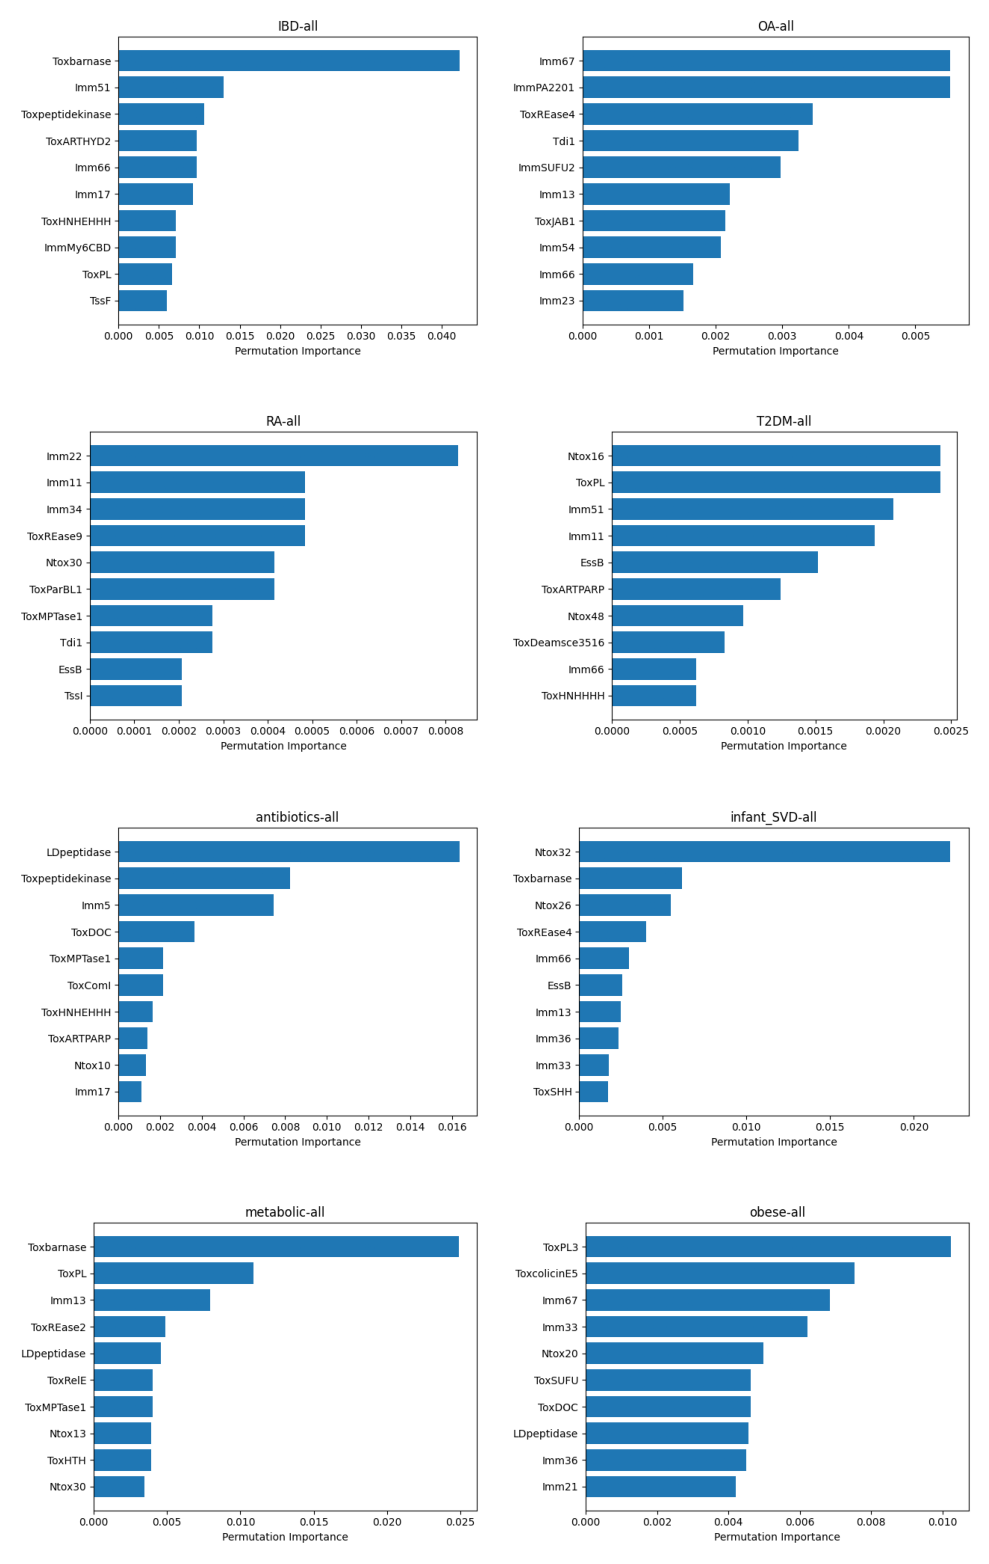

In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Folder containing the images
folder = "results"

# Find all files starting with "perm" in the folder
files = sorted([f for f in os.listdir(folder) if f.startswith("perm") and f.endswith(".png")])

# Number of rows and columns for the grid
rows, cols = 4, 2

# Create the figure
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))  # Adjust size for better layout

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop over files and axes
for ax, file in zip(axes, files):
    # Read the image
    img = imread(os.path.join(folder, file))
    
    # Display the image in the subplot
    ax.imshow(img)
    ax.axis('off')  # Turn off axes for cleaner display

# Turn off any unused subplots
for ax in axes[len(files):]:
    ax.axis('off')

# Save the combined figure
output_file = "results/combined_perm.png"
plt.tight_layout()
plt.savefig(output_file, bbox_inches='tight')
plt.show()
